In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster', font_scale=2.0)
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (12.8, 9.6)
plt.rcParams['figure.facecolor'] = 'white'


In [3]:
import pickle

In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [5]:
import scipy

import scipy.constants as sc
hbarc = ( sc.hbar * sc.speed_of_light
         / sc.mega / sc.electron_volt / sc.femto )
ainv = 2.194e3 # lattice cutoff in GeV
lat_unit = hbarc/ainv # lattice spacing in fm

mxi = 0.665 # mass of Xi in lattice unit
mpi = 510/ainv # mass of pion in lattice unit

In [6]:
print(np.__version__)
print(scipy.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.14.2
1.0.0
0.8.1
2.2.2


# import data

In [7]:
v0_lo_jk = {}
for src in ['wall', 'exp']:
    with open(f'../data/potential/pot_jk_1s0_xixi_L64_{src}.pkl', 'rb') as fin:
        _, rs, v0_lo_jk[src] = pickle.load(fin)

In [8]:
with open(f'pkls/n2lo_pot_jk.pkl', 'rb') as fin:
    rs, v0_n2lo_jk, v2_n2lo_jk = pickle.load(fin)

In [9]:
v0_n2lo_jk[13].shape

(20, 6545)

In [10]:
bin_num = v0_n2lo_jk[13].shape[0]

# check data

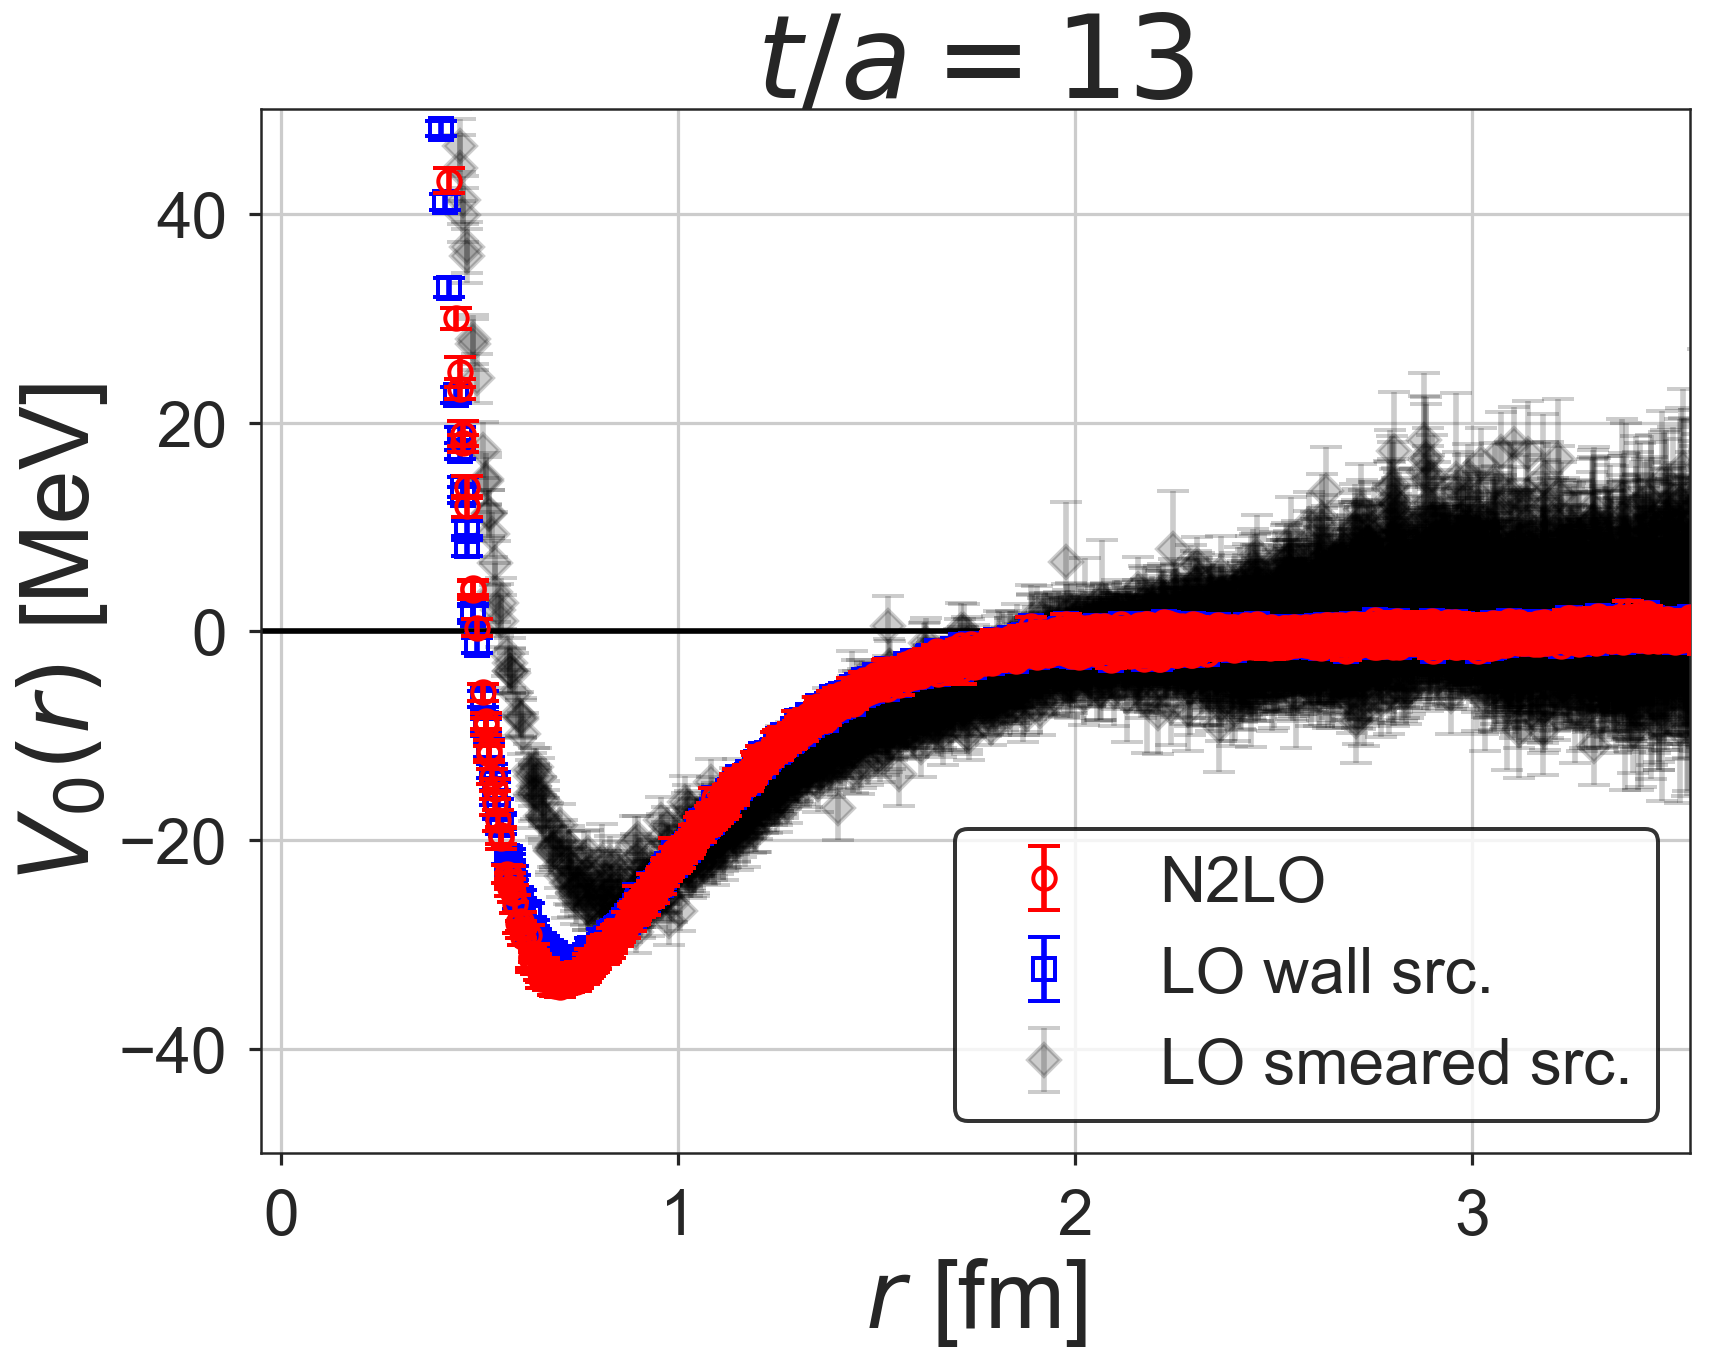

In [11]:
it = 13

fig, ax = plt.subplots()
ax.errorbar(rs * lat_unit, 
            v0_n2lo_jk[it].mean(axis=0) * ainv, 
            v0_n2lo_jk[it].std(axis=0) * np.sqrt(bin_num - 1) * ainv,
            fmt='ro', mfc='none', mec='red', mew=2.0, capsize=8, capthick=2.0,
            label='N2LO', zorder=5)

ax.errorbar(rs * lat_unit, 
            v0_lo_jk['wall'][it].mean(axis=0) * ainv, 
            v0_lo_jk['wall'][it].std(axis=0) * np.sqrt(bin_num - 1) * ainv,
            fmt='bs', mfc='none', mec='blue', mew=2.0, capsize=8, capthick=2.0,
            label='LO wall src.', zorder=3)

ax.errorbar(rs * lat_unit, 
            v0_lo_jk['exp'][it].mean(axis=0) * ainv, 
            v0_lo_jk['exp'][it].std(axis=0) * np.sqrt(bin_num - 1) * ainv,
            fmt='kD', mfc='none', mec='black', mew=2.0, capsize=8, capthick=2.0,
            label='LO smeared src.', zorder=1, alpha=0.2)

ax.set_title(f'$t/a = {it}$', size=58)
ax.grid()
ax.set_ylim(-50, 50)
ax.set_xlim(-0.05, 3.55)
ax.axhline(0, color='black')
ax.set_ylabel(r'$V_0(r)$ [MeV]', size=48)
ax.set_xlabel(r'$r$ [fm]', size=48)

leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)

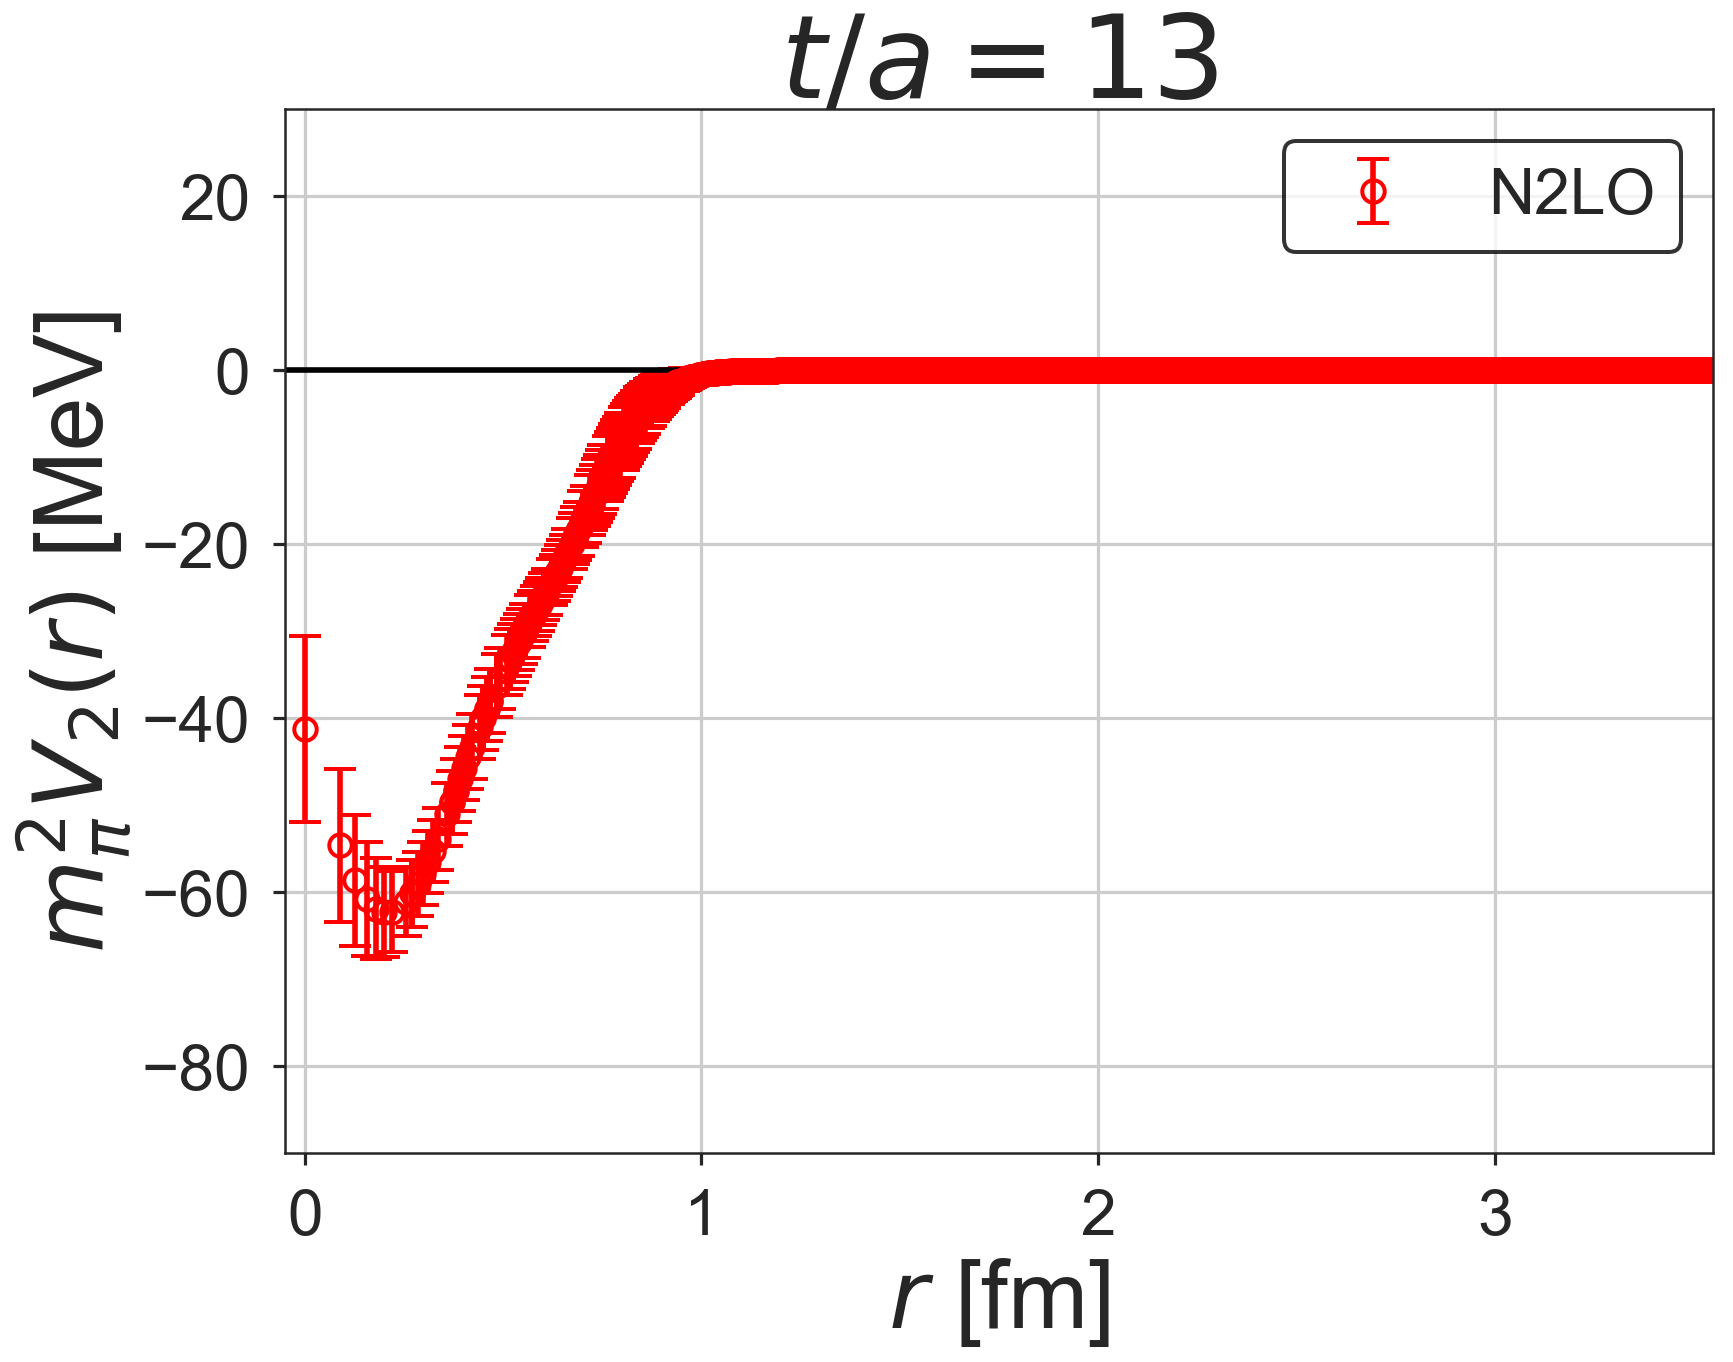

In [12]:
it = 13

fig, ax = plt.subplots()
ax.errorbar(rs * lat_unit, 
            v2_n2lo_jk[it].mean(axis=0) * mpi**2 * ainv, 
            v2_n2lo_jk[it].std(axis=0) * np.sqrt(bin_num - 1) * mpi**2 * ainv,
            fmt='ro', mfc='none', mec='red', mew=2.0, capsize=8, capthick=2.0,
            label='N2LO')

ax.set_title(f'$t/a = {it}$', size=58)
ax.grid()
ax.set_ylim(-90, 30)
ax.set_xlim(-0.05, 3.55)
ax.axhline(0, color='black')
ax.set_ylabel(r'$m_\pi^2 V_2(r)$ [MeV]', size=48)
ax.set_xlabel(r'$r$ [fm]', size=48)

leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)

# Energy-dependent local potential
$V^\mathrm{eff}(r; E) \equiv \frac{V_0 - m_B E V_2}{1 - m_B V_2}$

In [13]:
it = 13

v0_av = v0_n2lo_jk[it].mean(axis=0)
v0_err = v0_n2lo_jk[it].std(axis=0) * np.sqrt(bin_num - 1)

v2_av = v2_n2lo_jk[it].mean(axis=0)
v2_err = v2_n2lo_jk[it].std(axis=0) * np.sqrt(bin_num - 1)

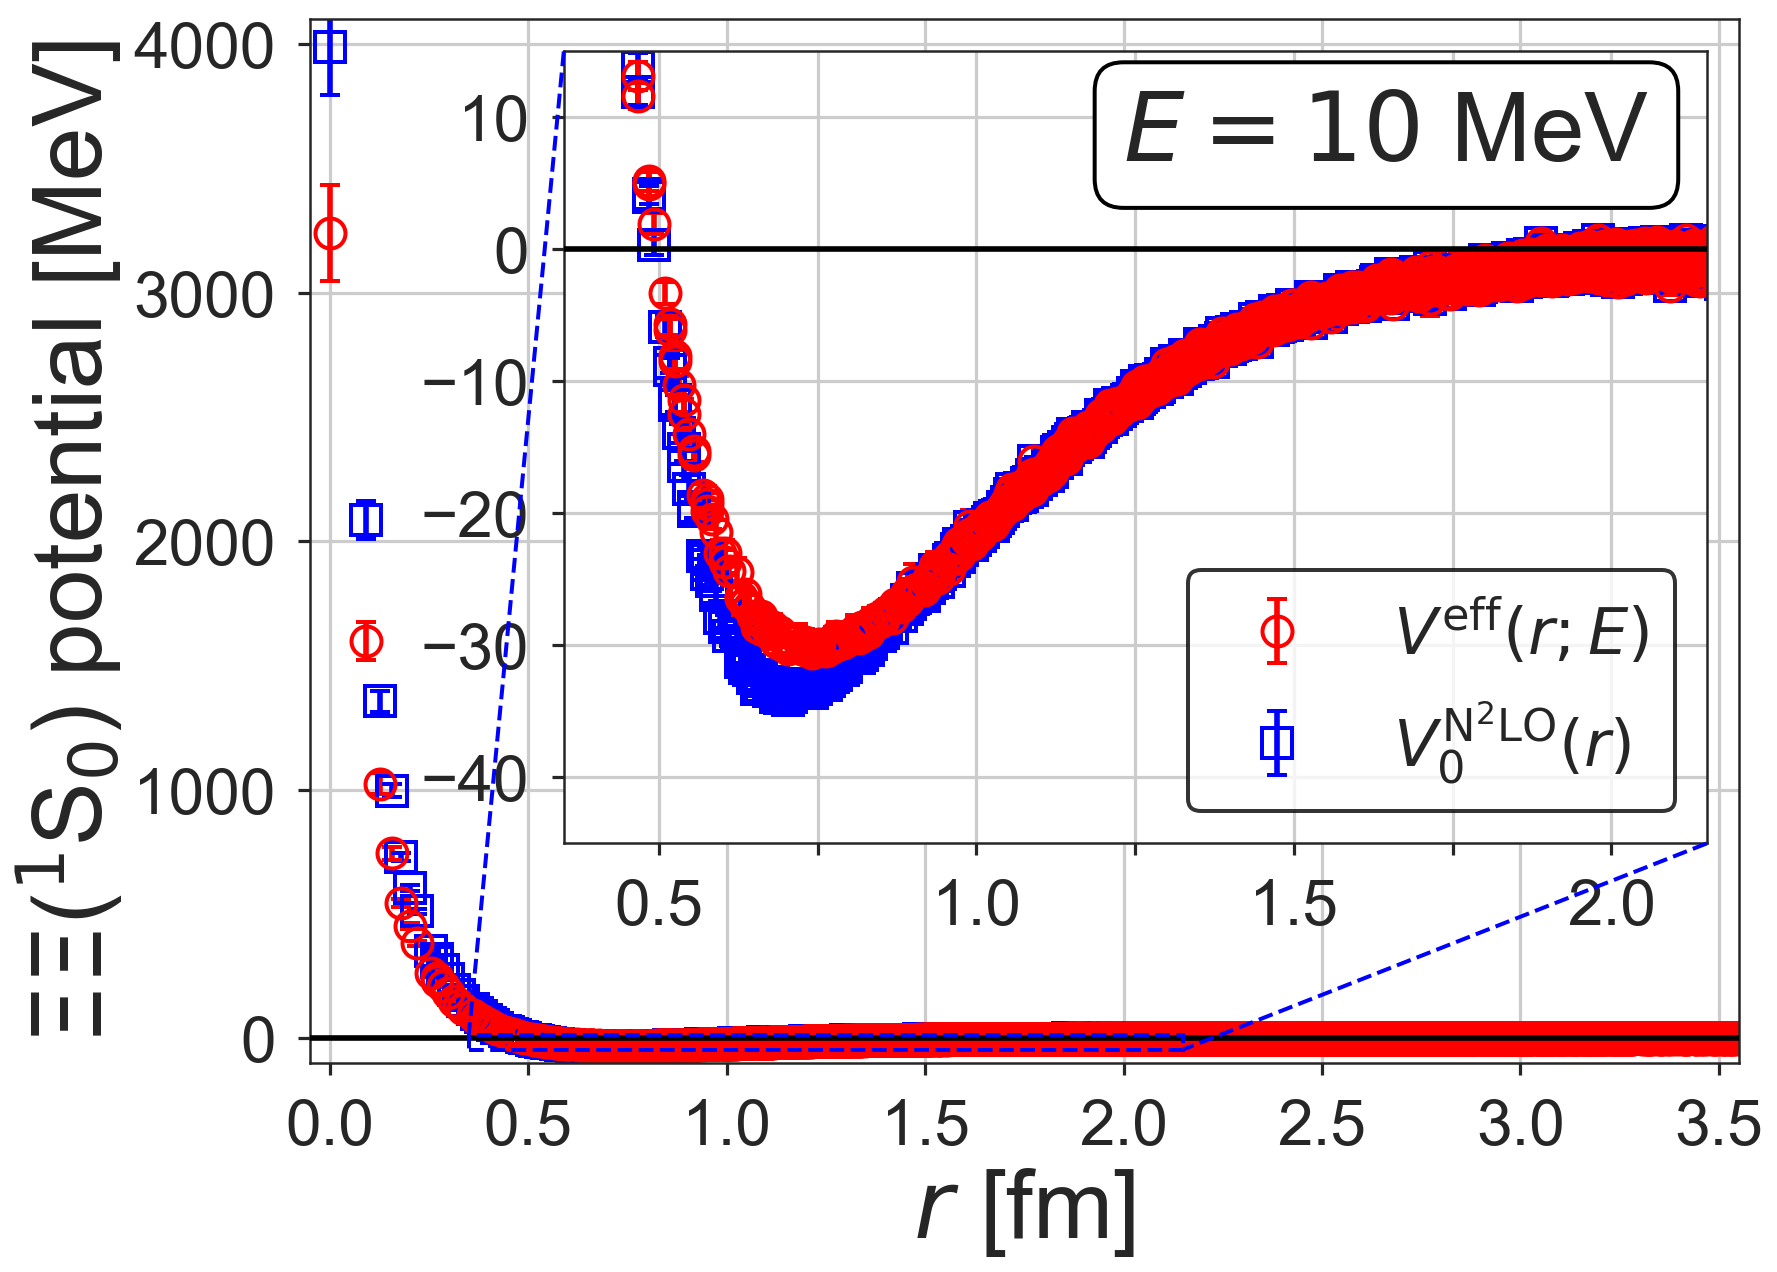

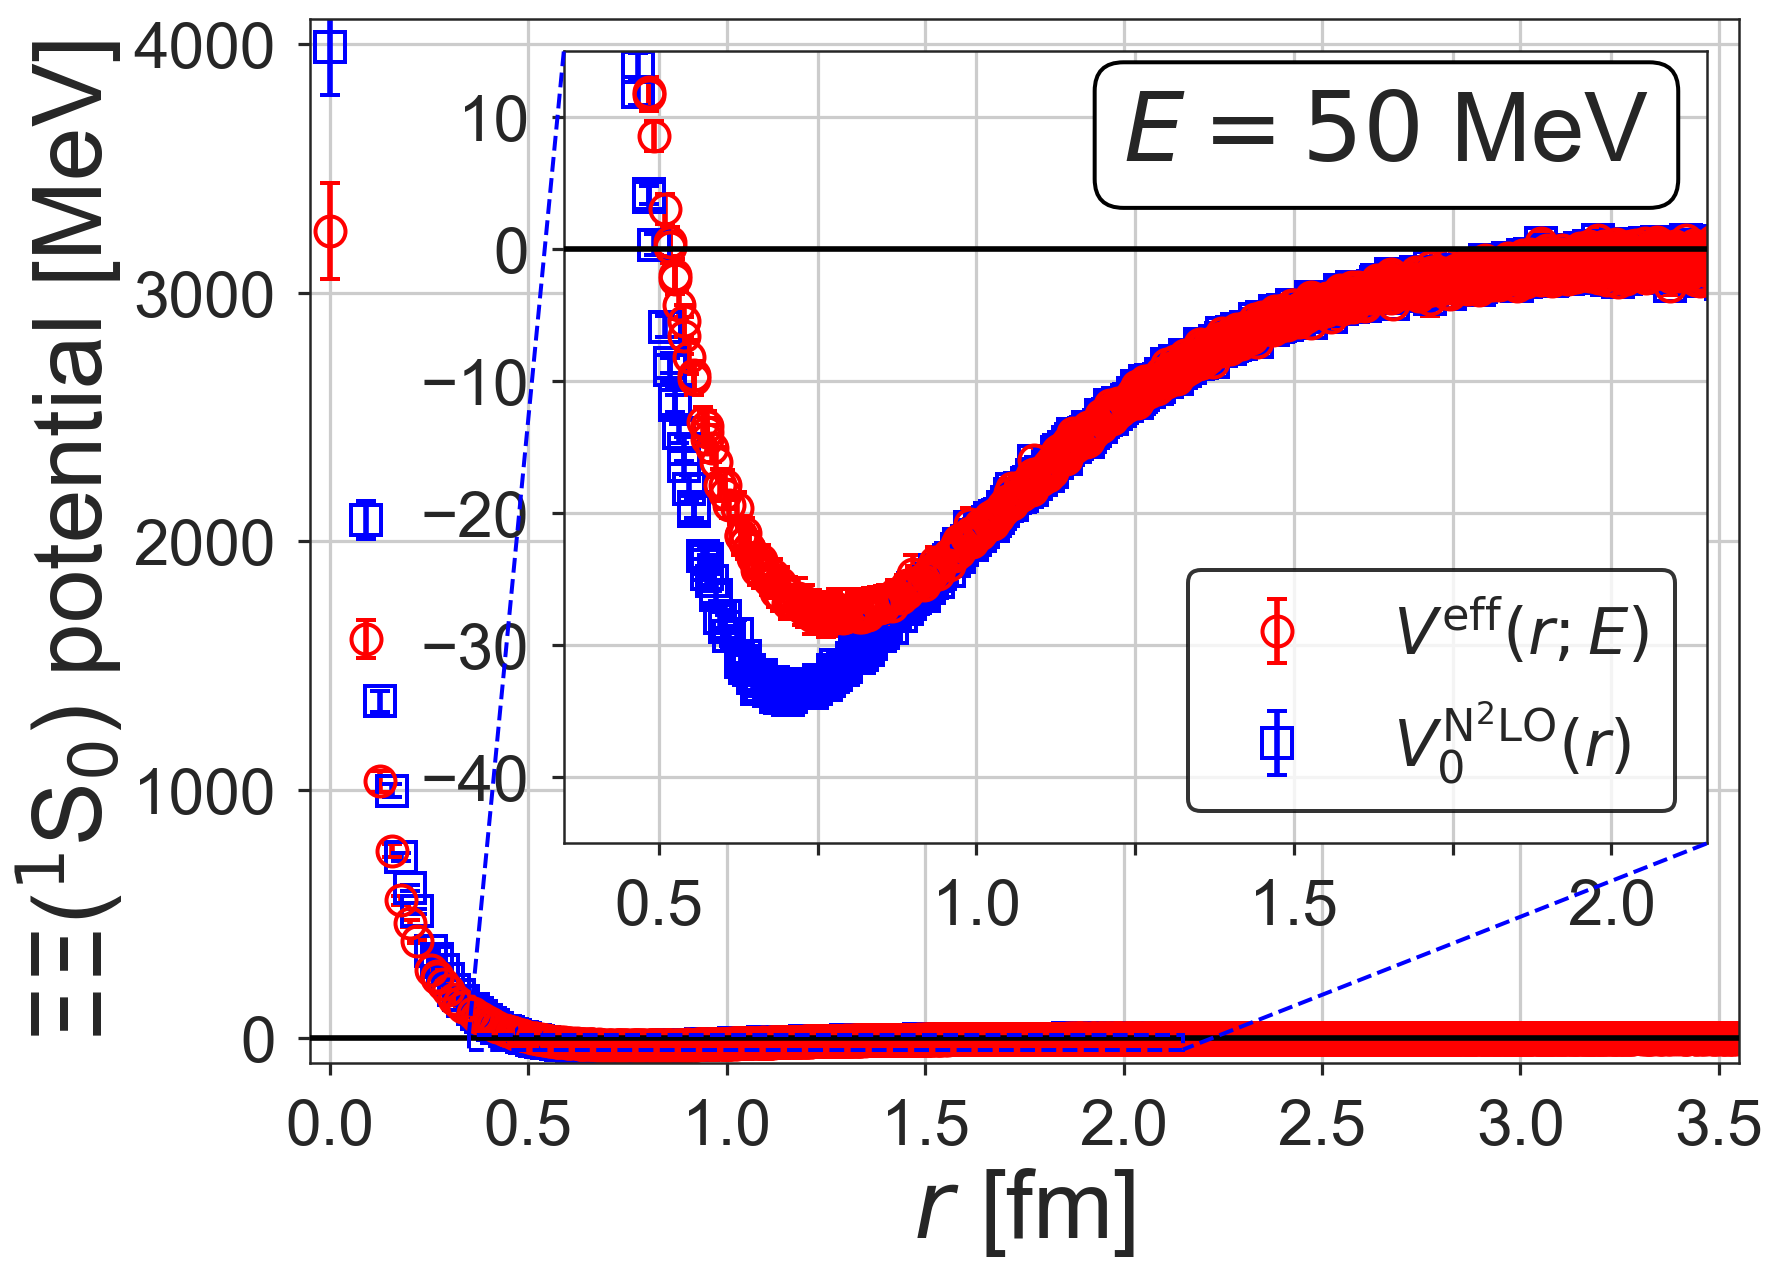

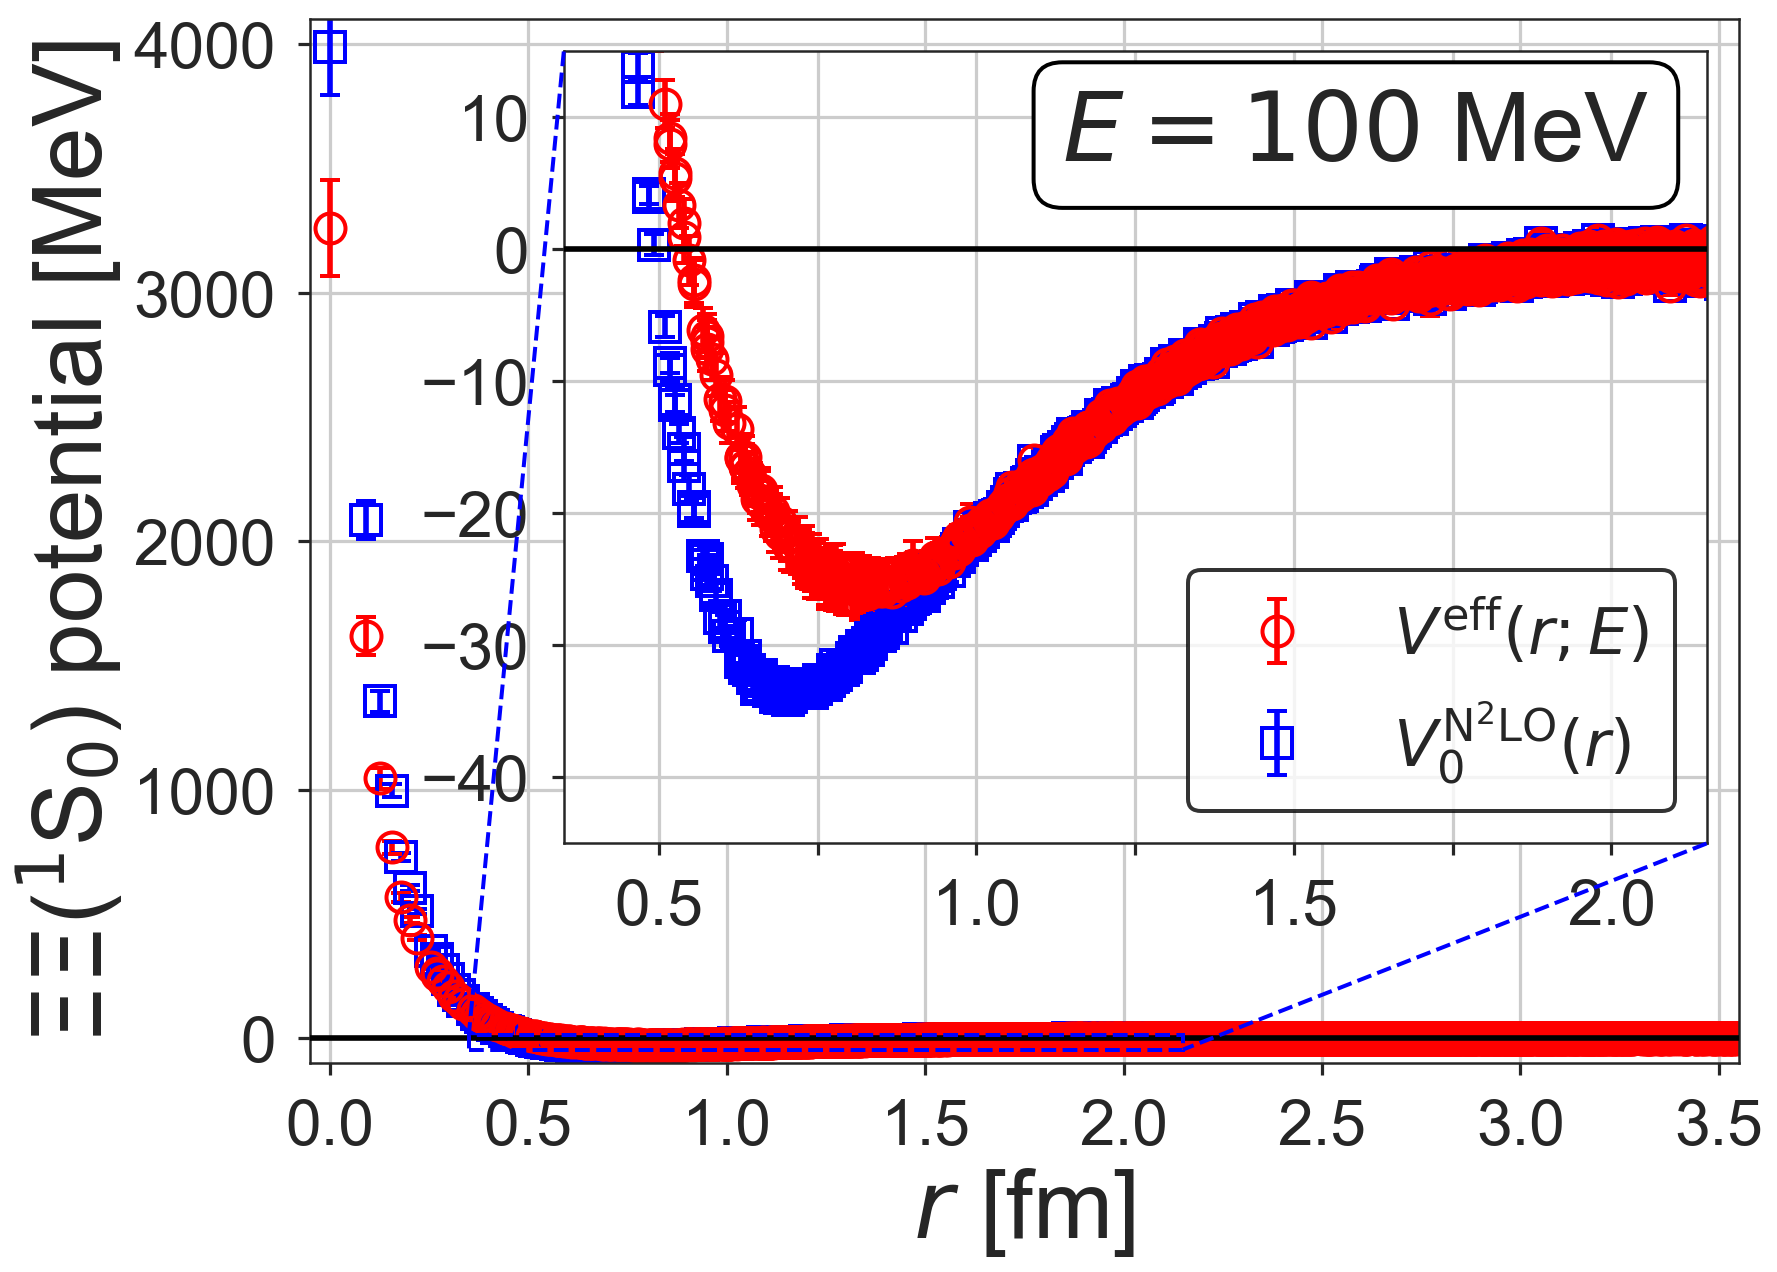

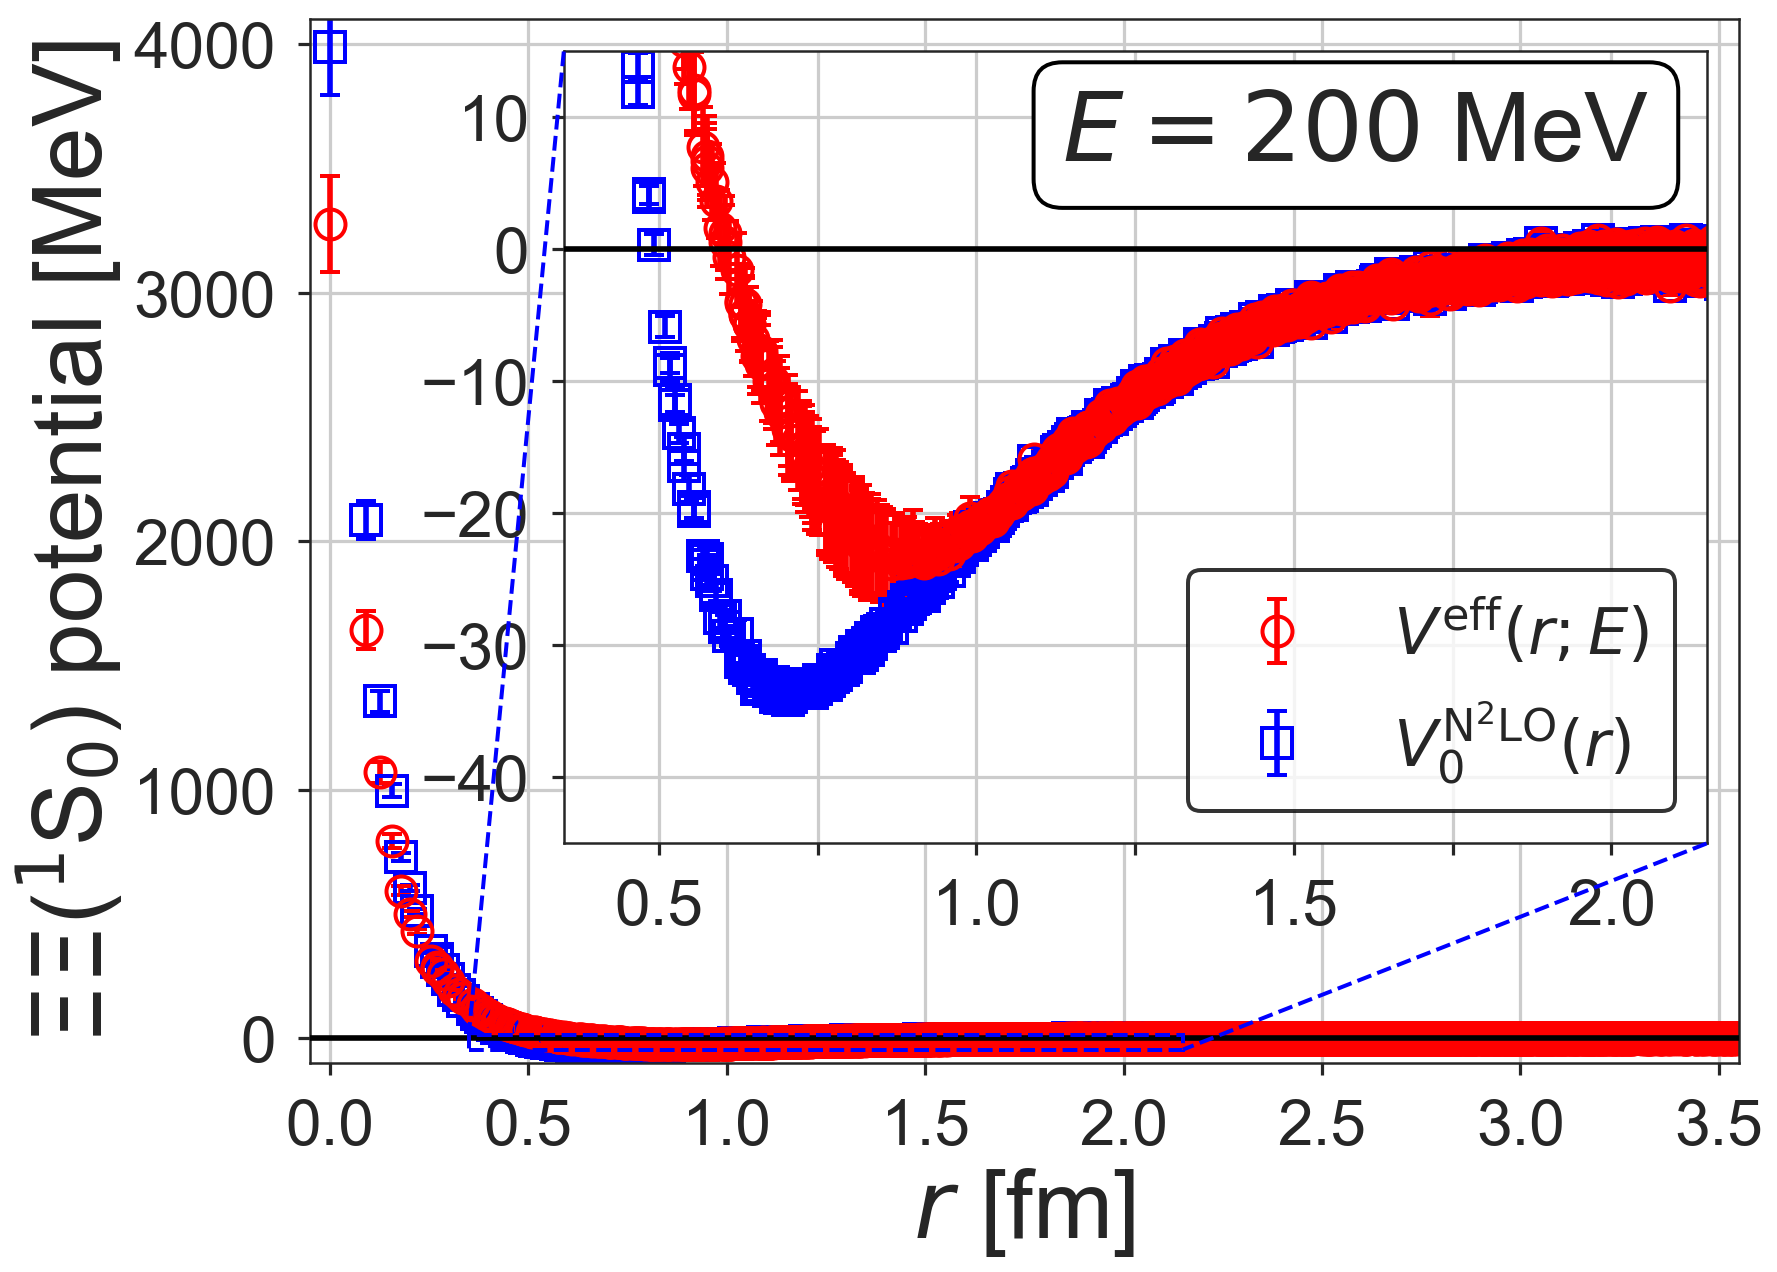

In [14]:
def plot_Edep_pot(E):
    E = E/ainv
    fig, ax = plt.subplots()
    nlo_corr = 1.0/(1 - v2_av * mxi)
    ys = (v0_av - E * mxi * v2_av) * nlo_corr * ainv
    yerrs = np.sqrt(v0_err**2 + mxi**2 * E **2 * nlo_corr**2 * v2_err**2) * ainv

    ax.errorbar(rs*lat_unit, v0_av*ainv, v0_err*ainv,
                capsize=5, capthick=2, fmt='s', color='blue', mfc='none', 
                mew=2.0, ms=15)

    ax.errorbar(rs*lat_unit, ys, yerrs,
               fmt='o', c='red', mfc='none', mew=2.0, ms=15,
                capsize=5, capthick=2, mec='red')
    ax.set_xlim(-0.05, 3.55)
    ax.set_xticks(np.arange(0,3.55,0.5))
    ax.set_ylim(-100, 4100)
    ax.set_xlabel(r'$r$ [fm]', size=48)
    ax.set_ylabel(r'$\Xi\Xi$($^1$S$_0$) potential [MeV]', size=48)
    ax.grid()
    ax.axhline(0, c='black', zorder=3)

    axins = inset_axes(ax, width='80%', height=5.5, loc=1)
    axins.errorbar(rs*lat_unit, v0_av*ainv, v0_err*ainv,
               fmt='s', c='blue', label='$V_0^\mathrm{N^2LO}(r)$', capsize=5, capthick=2, ms=15,
                  mfc='none', mew=2)

    axins.errorbar(rs*lat_unit, ys, yerrs,
               fmt='o', c='red', mfc='none', mew=2.0, mec='red', ms=15,
                  label=r'$V^\mathrm{eff}(r;E)$', capsize=5, capthick=2)
    axins.set_xlim(0.35, 2.15)
    axins.set_xticks(np.arange(0.5, 2.1, 0.25))
    axins.set_xticklabels([0.5, '', 1.0, '', 1.5, '', 2.0])
    axins.set_ylim(-45, 15)

    axins.grid()
    axins.axhline(0, c='black', zorder=3)
    hh, ll = axins.get_legend_handles_labels()
    leg = axins.legend(hh[::-1], ll[::-1], loc='lower right', frameon=True)
    leg.get_frame().set_edgecolor('black')
    leg.get_frame().set_linewidth(2.0)

    xr = axins.get_xlim()
    yr = axins.get_ylim()
    props = dict(boxstyle='round', facecolor='white', linewidth=2, alpha=1.0)
    axins.text(xr[0]+0.95*(xr[1]-xr[0]), yr[1] - 0.05*(yr[1]-yr[0]), 
                       rf'$E = {E*ainv:3.0f}$ MeV', fontsize=48, bbox=props,
                       horizontalalignment='right',
                       verticalalignment='top')
    mark_inset(ax, axins, loc1=2, loc2=4, fc='none', 
              ec='blue', linestyle='--', lw=2, zorder=5)
    fig.savefig(f'../figs/pot_N2LO/E_dep_pot_{E*ainv:.0f}.png', bbox_inches='tight')

for E in [10, 50, 100, 200]:
    plot_Edep_pot(E)